In [1]:
from seq_process import pickle_to_sequence, folders_to_sequence, normalize_seq, draw_squeleton, draw_sequence

In [2]:
from __future__ import print_function

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf

import pandas as pd
import pickle

from keras.layers import Input, LSTM, Dense, Lambda, Reshape, RepeatVector, TimeDistributed, CuDNNLSTM
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras import backend as K
from keras import metrics

Using TensorFlow backend.


In [3]:
# 10s sequences, non overlapping
seq_data, samples, targets = folders_to_sequence(folder_list=['./sarahscottpole/vid_out/',                                                                
                                                              './phoenixkazree/vid_out/',
                                                              './bridgetmonro/vid_out/',
                                                              './nicocasa/vid_out/'] ,
                                                lookback=300, steps=1, forward=1, lag=300,
                                                retain_previous=True, standardize=False, normalize=True, head=False,
                                                seq2seq=False, add_flip=True)
 

len(samples)

./sarahscottpole/vid_out/
2017-09-20_20-07-55_UTC.mp4_out.avi
2017-09-22_17-38-00_UTC.mp4_out.avi
2017-09-24_18-09-20_UTC.mp4_out.avi
2017-09-29_13-30-13_UTC.mp4_out.avi
2017-09-30_20-35-03_UTC.mp4_out.avi
2017-10-05_17-08-26_UTC.mp4_out.avi
2017-10-17_15-58-11_UTC.mp4_out.avi
2017-10-19_17-05-02_UTC.mp4_out.avi
2017-10-21_20-24-48_UTC.mp4_out.avi
2017-10-23_16-02-46_UTC.mp4_out.avi
2017-10-24_15-50-51_UTC.mp4_out.avi
2017-10-26_15-58-41_UTC.mp4_out.avi
2017-10-27_16-19-58_UTC.mp4_out.avi
2017-10-30_20-59-44_UTC.mp4_out.avi
2017-11-01_17-56-35_UTC.mp4_out.avi
2017-11-03_17-44-33_UTC.mp4_out.avi
2017-11-08_16-53-51_UTC.mp4_out.avi
2017-11-10_19-11-35_UTC.mp4_out.avi
2017-11-14_16-11-43_UTC.mp4_out.avi
2017-11-16_16-32-35_UTC.mp4_out.avi
2017-11-20_16-34-40_UTC.mp4_out.avi
2017-11-22_17-28-52_UTC.mp4_out.avi
2017-11-24_15-01-04_UTC.mp4_out.avi
2017-11-27_16-35-13_UTC.mp4_out.avi
2017-11-29_17-12-58_UTC.mp4_out.avi
2017-11-30_17-02-08_UTC.mp4_out.avi
2017-12-02_15-00-06_UTC.mp4_out.avi
20

2016-10-10_09-38-34_UTC.mp4_out.avi
2016-10-11_00-32-05_UTC.mp4_out.avi
2016-10-20_10-34-53_UTC.mp4_out.avi
2016-10-21_04-21-16_UTC.mp4_out.avi
2016-10-22_00-02-05_UTC.mp4_out.avi
2016-10-23_04-58-50_UTC.mp4_out.avi
2016-10-24_09-12-27_UTC.mp4_out.avi
2016-10-26_00-03-14_UTC.mp4_out.avi
2016-10-28_10-11-39_UTC.mp4_out.avi
2016-10-29_14-30-32_UTC.mp4_out.avi
2016-10-30_13-13-23_UTC.mp4_out.avi
2016-10-31_07-32-45_UTC.mp4_out.avi
2016-11-01_08-51-51_UTC.mp4_out.avi
2016-11-03_09-29-13_UTC.mp4_out.avi
2016-11-04_13-14-24_UTC.mp4_out.avi
2016-11-08_15-28-39_UTC.mp4_out.avi
2016-11-08_15-43-24_UTC.mp4_out.avi
2016-11-11_01-33-49_UTC.mp4_out.avi
2016-11-11_15-27-48_UTC.mp4_out.avi
2016-11-13_13-18-16_UTC.mp4_out.avi
2016-11-15_08-01-56_UTC.mp4_out.avi
2016-11-16_04-36-19_UTC.mp4_out.avi
2016-11-18_18-17-06_UTC.mp4_out.avi
2016-11-18_20-25-00_UTC.mp4_out.avi
2016-11-21_16-41-35_UTC.mp4_out.avi
2016-11-23_00-12-59_UTC.mp4_out.avi
2016-11-28_22-50-37_UTC.mp4_out.avi
2016-11-29_23-14-24_UTC.mp4_

2018-03-31_02-04-36_UTC.mp4_out.avi
2018-04-02_01-16-18_UTC.mp4_out.avi
2018-04-05_21-55-23_UTC.mp4_out.avi
2018-04-06_21-28-15_UTC.mp4_out.avi
2018-04-10_22-39-08_UTC.mp4_out.avi
2018-04-13_21-36-03_UTC.mp4_out.avi
2018-04-15_17-49-03_UTC.mp4_out.avi
2018-04-17_21-10-43_UTC.mp4_out.avi
2018-04-19_21-49-30_UTC.mp4_out.avi
2018-04-24_15-26-17_UTC.mp4_out.avi
2018-04-27_00-23-46_UTC.mp4_out.avi
2018-05-01_20-46-14_UTC.mp4_out.avi
2018-05-03_04-53-26_UTC.mp4_out.avi
2018-05-04_03-54-33_UTC.mp4_out.avi
2018-05-05_22-04-30_UTC.mp4_out.avi
2018-05-15_04-03-20_UTC.mp4_out.avi
2018-05-17_04-51-47_UTC.mp4_out.avi
2018-05-17_20-00-49_UTC.mp4_out.avi
2018-05-26_01-54-17_UTC.mp4_out.avi
2018-05-27_23-52-04_UTC.mp4_out.avi
2018-06-01_05-32-37_UTC.mp4_out.avi
2018-06-05_01-52-27_UTC.mp4_out.avi
2018-06-06_03-46-45_UTC.mp4_out.avi
2018-06-07_02-17-33_UTC.mp4_out.avi
2018-06-12_23-09-27_UTC.mp4_out.avi
2018-06-14_11-07-44_UTC.mp4_out.avi
2018-06-19_13-45-28_UTC.mp4_out.avi
2018-06-20_12-23-19_UTC.mp4_

2019-03-17_16-06-14_UTC.mp4_out.avi
2019-03-27_14-22-57_UTC.mp4_out.avi
2019-03-30_14-54-10_UTC.mp4_out.avi
2019-04-04_16-54-44_UTC.mp4_out.avi
2019-04-12_14-51-54_UTC.mp4_out.avi
2019-04-16_15-24-02_UTC.mp4_out.avi
2019-05-01_10-41-48_UTC.mp4_out.avi
2019-05-04_09-03-16_UTC.mp4_out.avi
2019-05-14_08-00-04_UTC.mp4_out.avi
2019-05-21_13-59-41_UTC.mp4_out.avi
2019-05-28_09-55-13_UTC.mp4_out.avi
2019-06-11_15-30-07_UTC.mp4_out.avi
2019-06-17_16-15-30_UTC.mp4_out.avi
2019-06-19_07-42-14_UTC.mp4_out.avi
2019-06-22_07-31-38_UTC.mp4_out.avi


2259

In [4]:
samples.shape

(2259, 300, 26)

In [5]:
pose_pt = 26
timesteps = 300
channels = 1

# Input image dimensions
seq_shape = (timesteps, pose_pt)

# Size of the noise vector, used as input to the Generator
z_dim = 256

## generator

In [6]:
def build_generator(seq_shape,z_dim):

    model = Sequential()
    
    model.add(RepeatVector(timesteps, input_shape=(z_dim,)))
    
    model.add(CuDNNLSTM(256, return_sequences=True))
    
    model.add(CuDNNLSTM(128, return_sequences=True))
    
    model.add(CuDNNLSTM(64, return_sequences=True))
    
    model.add(CuDNNLSTM(pose_pt, return_sequences=True))
    
    return model

In [7]:
generator = build_generator(seq_shape,z_dim)

In [8]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
repeat_vector_1 (RepeatVecto (None, 300, 256)          0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 300, 256)          526336    
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 300, 128)          197632    
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 300, 64)           49664     
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 300, 26)           9568      
Total params: 783,200
Trainable params: 783,200
Non-trainable params: 0
_________________________________________________________________


## Discriminator

In [9]:
def build_discriminator(seq_shape):

    model = Sequential()
    
    model.add(CuDNNLSTM(256, input_shape=(timesteps, pose_pt), return_sequences=True))
    
    model.add(CuDNNLSTM(128, return_sequences=True))
        
    model.add(CuDNNLSTM(64, return_sequences=True))
    
    model.add(CuDNNLSTM(32))
    
    model.add(Dense(1, activation='sigmoid'))

    return model

In [10]:
discriminator = build_discriminator(seq_shape)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_5 (CuDNNLSTM)     (None, 300, 256)          290816    
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 300, 128)          197632    
_________________________________________________________________
cu_dnnlstm_7 (CuDNNLSTM)     (None, 300, 64)           49664     
_________________________________________________________________
cu_dnnlstm_8 (CuDNNLSTM)     (None, 32)                12544     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 550,689
Trainable params: 550,689
Non-trainable params: 0
_________________________________________________________________


## Build the model

In [11]:
def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

In [12]:
# Build and compile the Discriminator
discriminator = build_discriminator(seq_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])

# Build the Generator
generator = build_generator(seq_shape, z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [13]:
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 300, 26)           783200    
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 550689    
Total params: 1,333,889
Trainable params: 783,200
Non-trainable params: 550,689
_________________________________________________________________


## Training

In [18]:
losses = []
accuracies = []
iteration_checkpoints = []


def train(iterations, batch_size, sample_interval):

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real seqs
        idx = np.random.randint(0, samples.shape[0], batch_size)
        seqs = samples[idx]

        # Generate a batch of fake seqs
        z = np.random.normal(0, 1, (batch_size, z_dim))
        gen_seqs = generator.predict(z)

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(seqs, real)
        d_loss_fake = discriminator.train_on_batch(gen_seqs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, z_dim))
        gen_seqs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            #sample_images(generator)

In [19]:
# Set hyperparameters
iterations = 10000
batch_size = 128
sample_interval = 100

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

C:\Users\ben.vdb\.conda\envs\openpose\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


100 [D loss: 0.072436, acc.: 98.44%] [G loss: 3.046290]
200 [D loss: 0.709247, acc.: 50.00%] [G loss: 0.774168]
300 [D loss: 0.671723, acc.: 53.52%] [G loss: 0.775468]
400 [D loss: 0.694220, acc.: 41.41%] [G loss: 0.730050]
500 [D loss: 0.694819, acc.: 48.05%] [G loss: 0.691633]
600 [D loss: 0.692495, acc.: 48.44%] [G loss: 0.733249]
700 [D loss: 0.694015, acc.: 50.00%] [G loss: 0.692113]
800 [D loss: 0.693940, acc.: 49.61%] [G loss: 0.691651]
900 [D loss: 0.688885, acc.: 49.22%] [G loss: 0.712936]
1000 [D loss: 0.693973, acc.: 46.09%] [G loss: 0.692843]
1100 [D loss: 0.693964, acc.: 35.55%] [G loss: 0.693060]
1200 [D loss: 0.693879, acc.: 50.39%] [G loss: 0.692921]
1300 [D loss: 0.693837, acc.: 16.80%] [G loss: 0.693470]
1400 [D loss: 0.693932, acc.: 0.00%] [G loss: 0.693516]
1500 [D loss: 0.693817, acc.: 1.56%] [G loss: 0.693377]
1600 [D loss: 0.693809, acc.: 3.12%] [G loss: 0.714855]
1700 [D loss: 0.693818, acc.: 0.39%] [G loss: 0.693995]
1800 [D loss: 0.693686, acc.: 0.00%] [G loss

In [31]:
gan.save('./models/gan.h5', overwrite=True)
generator.save('./models/gan_generator.h5', overwrite=True)

In [29]:
pred = generator.predict(np.random.normal(0, 1, (1, z_dim)))
draw_sequence(pred[0])

In [ ]:
draw_sequence(samples[200])

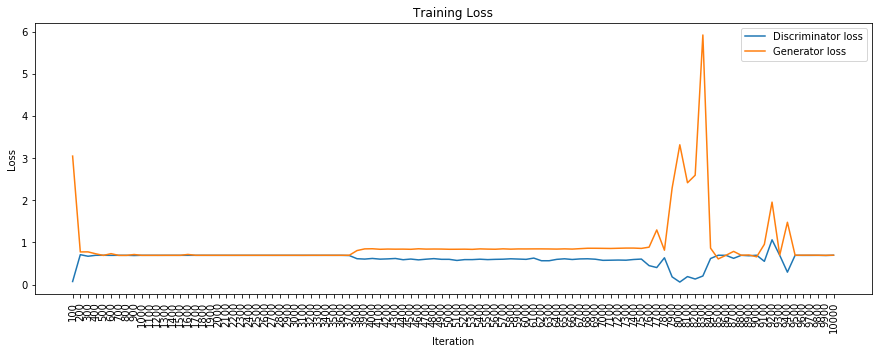

In [21]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

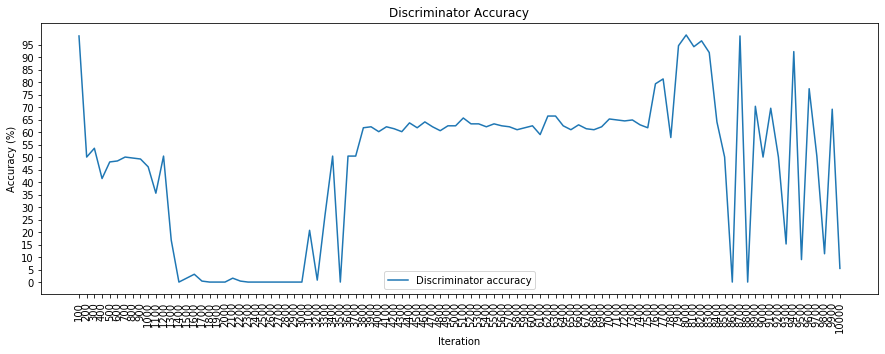

In [22]:
accuracies = np.array(accuracies)

# Plot Discriminator accuracy
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()